In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("/kaggle/input/get-label/labeled_comments.csv")
df

,course_id,text,text_vi,count,true_label
0,C_1011639,各位都是清华的,Mọi người đều đến từ Đại học Thanh Hoa,1.0,3.0
1,C_1011639,倒计时2min,Đếm ngược đến 2 phút,1.0,3.0
2,C_1011639,实在是闲居然很想看这个直播,Tôi thực sự muốn xem chương trình phát sóng tr...,1.0,4.0
3,C_1011639,签到,Đăng nhập,23.0,3.0
4,C_1011639,雨课堂加入不了班级,Không thể tham gia lớp học trong Rain Classroom,1.0,2.0
...,...,...,...,...,...
144782,C_955163,userid没有绑定成功吧,Userid không bị ràng buộc thành công?,1.0,3.0
144783,C_955163,讲的真好,Nói rất hay,1.0,5.0
144784,C_955163,通俗易懂,Dễ hiểu,1.0,5.0
144785,C_955163,easy,dễ,1.0,4.0


# Vẽ lại biểu đồ với số lượng hiển thị trên mỗi nhãn

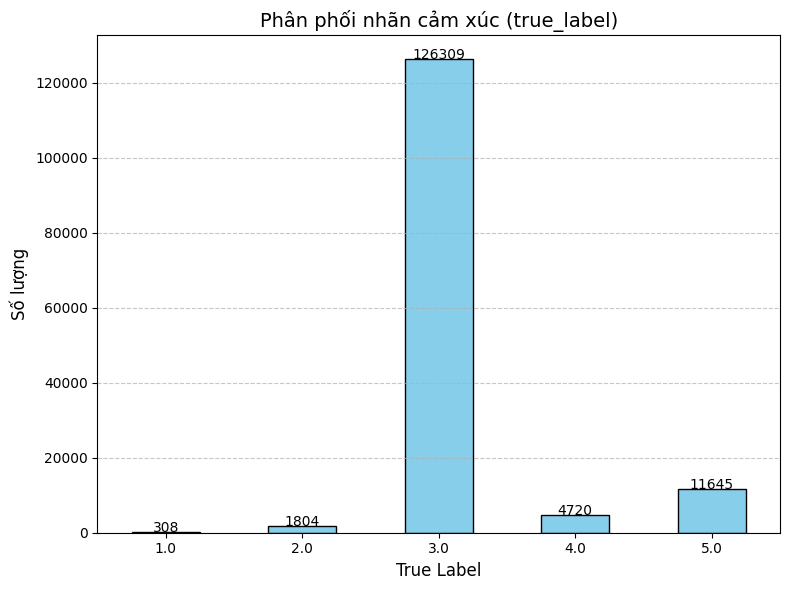

In [2]:
import matplotlib.pyplot as plt

# Vẽ lại biểu đồ với số lượng hiển thị trên mỗi nhãn
plt.figure(figsize=(8, 6))
value_counts = df['true_label'].value_counts().sort_index()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Thêm con số chỉ số lượng lên trên mỗi cột
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(int(value)), ha='center', fontsize=10, color='black')

# Tùy chỉnh biểu đồ
plt.title('Phân phối nhãn cảm xúc (true_label)', fontsize=14)
plt.xlabel('True Label', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lưu ảnh
output_path = '/kaggle/working/Hinh1.png'
plt.tight_layout()
plt.savefig(output_path)

# Ví dụ về các nhãn cảm xúc

In [3]:
# Tạo danh sách lưu các ví dụ cho từng nhãn
examples_per_label = {}

# Lặp qua từng nhãn từ 1 đến 5 và lấy 5 ví dụ từ dataframe
for label in range(1, 6):
    examples_per_label[label] = df[df['true_label'] == label]['text_vi'].tail(3).tolist()

# Xuất ra ví dụ cho từng nhãn
examples_per_label

{1: ['Phụ đề và giọng nói không khớp',
  'hơi khó khăn',
  'Phụ đề của phần này sai'],
 2: ['Video bị lỗi',
  'Video bị lỗi',
  'Khi tôi bấm vào chương trình mini, màn hình chuyển sang màu đen.'],
 3: ['Hoàn thành việc rải hoa',
  'Userid không bị ràng buộc thành công?',
  'Nếu phương thức được đặt thành đăng hoặc không có đủ tham số, việc gỡ lỗi của người đưa thư có thể được thực hiện.'],
 4: ['Không thể tải xuống', 'May mắn thay, tôi đã tạo ra một trang web', 'dễ'],
 5: ['Cơ sở dữ liệu rất tốt', 'Nói rất hay', 'Dễ hiểu']}

In [4]:
sum_count = df['count'].sum()
sum_count

445054.0

# Biểu đồ phân phối nhãn 2
Giảm count các nhãn 3 xuống 1

'/kaggle/working/Hinh 2.png'

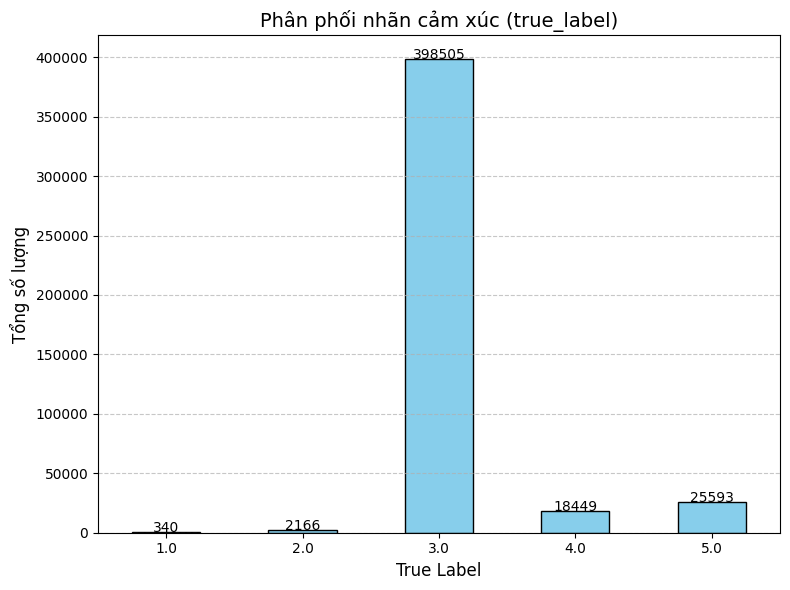

In [5]:
# Tính tổng 'count' theo từng nhãn
value_counts = df.groupby('true_label')['count'].sum().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Thêm con số chỉ số lượng lên trên mỗi cột
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(int(value)), ha='center', fontsize=10, color='black')

# Tùy chỉnh biểu đồ
plt.title('Phân phối nhãn cảm xúc (true_label)', fontsize=14)
plt.xlabel('True Label', fontsize=12)
plt.ylabel('Tổng số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lưu ảnh
output_path = '/kaggle/working/Hinh 2.png'
plt.tight_layout()
plt.savefig(output_path)

output_path

'/kaggle/working/Hinh 3.png'

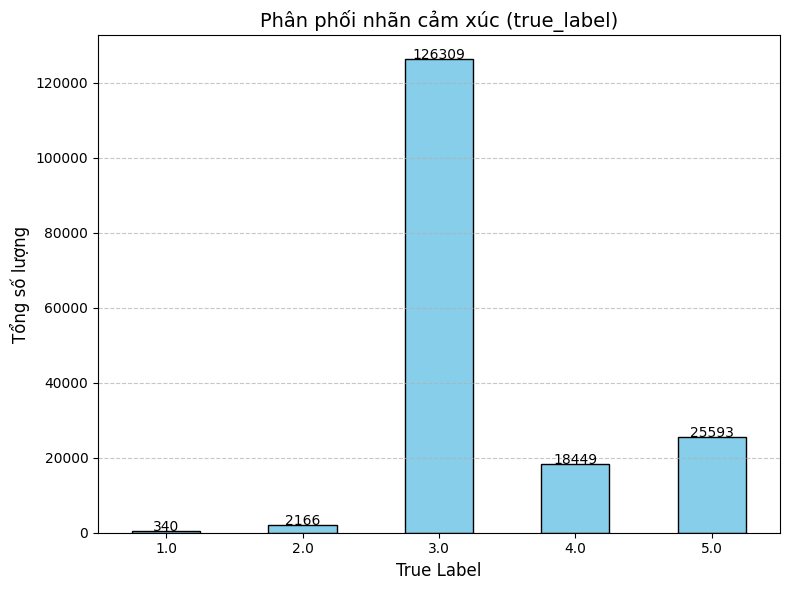

In [6]:
df1 = df.copy()
# Giảm giá trị 'count' của các dòng có 'true_label' = 3 xuống còn 1
df1.loc[df1['true_label'] == 3, 'count'] = 1

# Tính tổng 'count' theo từng nhãn
value_counts = df1.groupby('true_label')['count'].sum().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Thêm con số chỉ số lượng lên trên mỗi cột
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(int(value)), ha='center', fontsize=10, color='black')

# Tùy chỉnh biểu đồ
plt.title('Phân phối nhãn cảm xúc (true_label)', fontsize=14)
plt.xlabel('True Label', fontsize=12)
plt.ylabel('Tổng số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lưu ảnh
output_path = '/kaggle/working/Hinh 3.png'
plt.tight_layout()
plt.savefig(output_path)

output_path